In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
pd.set_option('display.max_rows', 300)

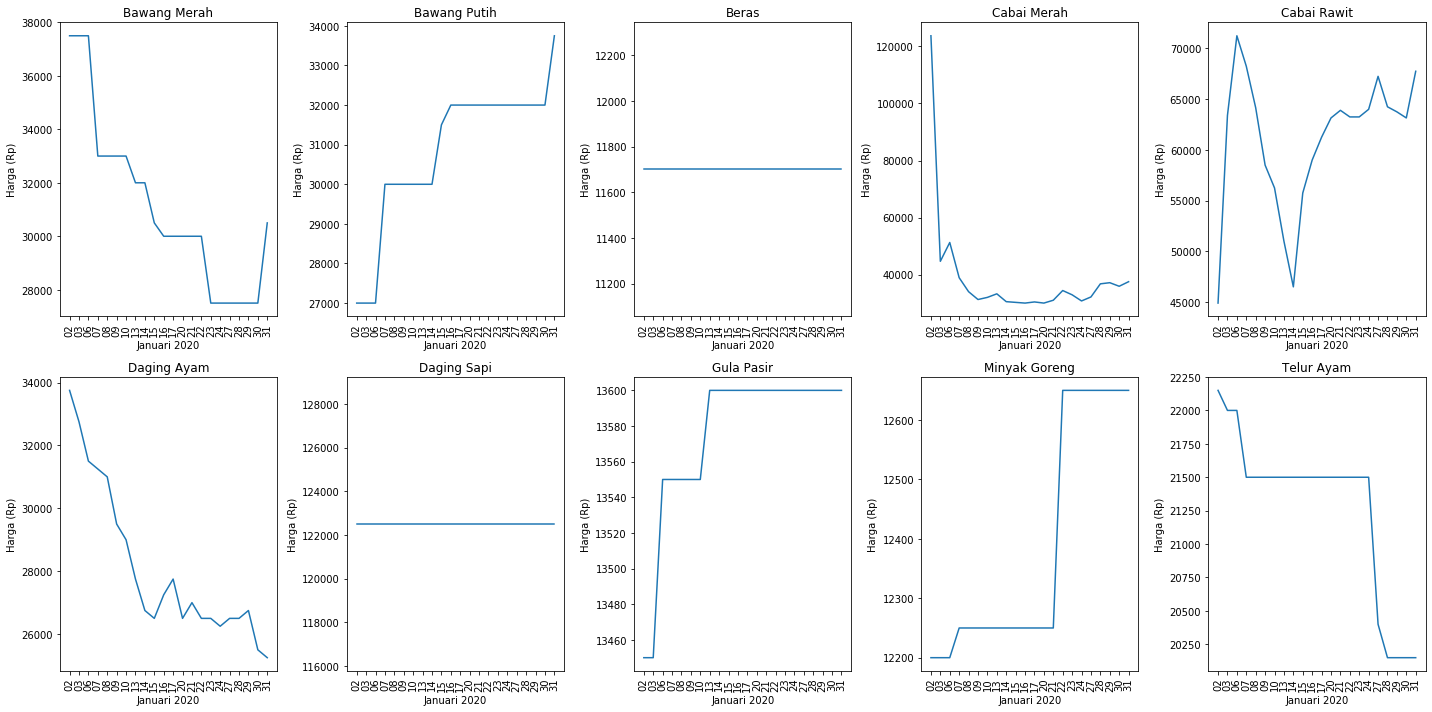

In [112]:

df = pd.read_csv('jan_2020.csv')
df = df.drop(columns='Unnamed: 0')
df.rename(columns={'Komoditas(Rp)' : 'Komoditas'}, inplace=True)
#print(df.columns)

df_melt = pd.melt(frame=df, id_vars=['Komoditas'], var_name="Tanggal", value_name='Harga')
df_melt=df_melt.sort_values(by=['Komoditas', 'Tanggal']).reset_index(drop=True)
#print(df_melt)
df_pivot = df_melt.pivot(columns='Komoditas', index='Tanggal', values='Harga').reset_index()
df_pivot['Hari'] = df_pivot.Tanggal.str.split('/', expand=True)[0]
#print(df_pivot)

list_ax = [0, 'ax1', 'ax2', 'ax3', 'ax4', 'ax5', 'ax6', 'ax7', 'ax8', 'ax9', 'ax10']
columns_df = [0, 'Bawang Merah', 'Bawang Putih', 'Beras', 'Cabai Merah',
       'Cabai Rawit', 'Daging Ayam', 'Daging Sapi', 'Gula Pasir',
       'Minyak Goreng', 'Telur Ayam']
plt.figure(figsize=(20, 10))
for i in range(1, 11):
    list_ax[i] = plt.subplot(2, 5, i)
    plt.plot(range(len(df_pivot)), df_pivot[columns_df[i]])
    list_ax[i].set_xticks(range(len(df_pivot)))
    list_ax[i].set_xticklabels(df_pivot['Hari'])
    plt.ylabel('Harga (Rp)')
    plt.title(columns_df[i])
    plt.xticks(rotation=90)
    plt.xlabel('Januari 2020')
plt.subplots_adjust(top=0.946, bottom=0.059, left=0.059, right=0.989, hspace=0.228, wspace=0.556)
plt.tight_layout()
plt.savefig('tes.png')
plt.show()